In [28]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sbn 


import sys 
sys.path.append('../src/')
from utils import load_config, get_corruption_scores

In [31]:
mydir = '../results/exp9/'

res = pd.read_csv(mydir + '/results.csv', sep='\t')
res.head(10)

,uid,config,config-checksum,method,perf_filter_low,perf_filter_high,runtime_s
0,d39d93f5-fa7f-4039-bf63-2ffd458aeab7,../configs/exp9.py,9cb1e0918704da628f99305e136b407e,dvgs,"[0.5339330729337536, 0.5370530995355268, 0.537...","[0.5325255460290186, 0.31468017107913693, 0.21...",291.719376
1,4194d6a2-6dca-4a0e-8ef3-e5c49573b8e0,../configs/exp9.py,9cb1e0918704da628f99305e136b407e,dvgs,"[0.5453119465669541, 0.547273534567071, 0.5468...","[0.5444237625726581, 0.3127493458247368, 0.190...",297.436404
2,6dde5be7-5f8d-43bb-910f-e40a4ac6e8ae,../configs/exp9.py,302897b89e678db273257f775c8141b9,apc,"[-0.29772922368069643, -0.3025822823196289, -0...","[-0.29772922368069643, -0.3025822823196289, -0...",19.172678
3,b6d4ffda-8c56-4b8b-96d4-7dcdda5a2eec,../configs/exp9.py,422b6b3144a1aacb74dd2b7f78fdbae4,dvrl,"[0.549150981807304, 0.5195598215210789, 0.4490...","[0.5493248435029483, 0.5465879828757492, 0.545...",3075.160253
4,d039bca1-db3b-419a-984c-c90d659adeb6,../configs/exp9.py,7fda8bf7b6ff289986265c07c4f7301d,apc,"[0.5446721050475989, 0.5460765748397177, 0.545...","[0.5460794409648685, 0.5004156623242253, 0.495...",580.629185
5,c4bde617-c85e-4795-a229-9c6b0fd86685,../configs/exp9.py,7fda8bf7b6ff289986265c07c4f7301d,dvrl,"[0.5376693360256, 0.5386716300679386, 0.537005...","[0.5376823716830336, 0.37620287920574025, 0.16...",2939.960701


In [36]:
import torch 
torch.sigmoid(torch.tensor([2]))

tensor([0.8808])

In [32]:
res = res.iloc[[0,1,4,5]]

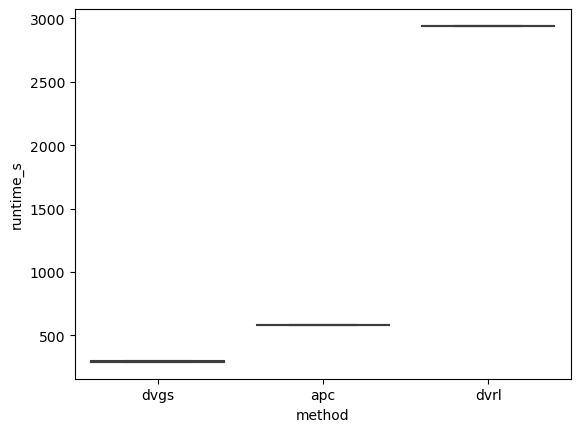

In [33]:
plt.figure()
sbn.boxplot(x='method', y='runtime_s', data=res)
plt.show()

In [26]:
config = load_config(res.config[0])

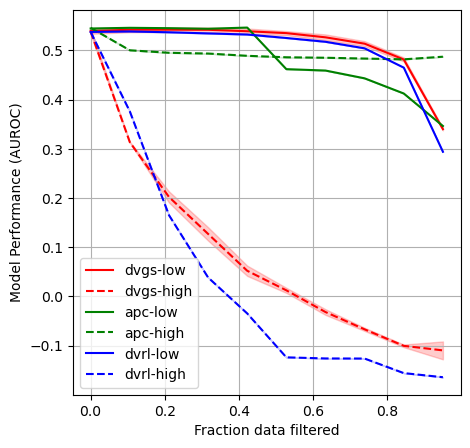

In [27]:
plt.figure(figsize=(5, 5))

for method, c in zip(res.method.unique(), ['r', 'g', 'b', 'm', 'c']): 

    _temp = res[lambda x: x.method == method]
    
    _low = [] 
    _high = [] 
    for i,row in _temp.iterrows(): 
        _low.append(row.perf_filter_low.strip('[]').split(','))
        _high.append(row.perf_filter_high.strip('[]').split(','))

    _low = np.stack(_low, axis=0).astype(float)
    _high = np.stack(_high, axis=0).astype(float)

    plt.plot(config.filter_kwargs['qs'], _low.mean(axis=0), color=c, label=f'{method}-low', linestyle='-')
    plt.fill_between(config.filter_kwargs['qs'], (_low.mean(axis=0)-_low.std(axis=0)), (_low.mean(axis=0)+_low.std(axis=0)), color=c, alpha=.2)

    plt.plot(config.filter_kwargs['qs'], _high.mean(axis=0), label = f'{method}-high', color=c, linestyle='--')
    plt.fill_between(config.filter_kwargs['qs'], (_high.mean(axis=0)-_high.std(axis=0)), (_high.mean(axis=0)+_high.std(axis=0)), color=c, alpha=.2)

plt.legend()
plt.xlabel('Fraction data filtered')
plt.ylabel('Model Performance (AUROC)')
plt.grid(b=None)
plt.show()